In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [8]:
df_bookings.shape

(134590, 12)

In [10]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [11]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [12]:
df_bookings.room_category.value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

In [13]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

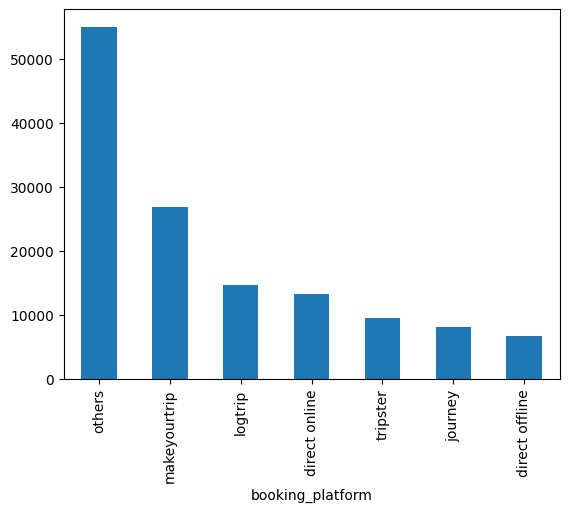

In [14]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

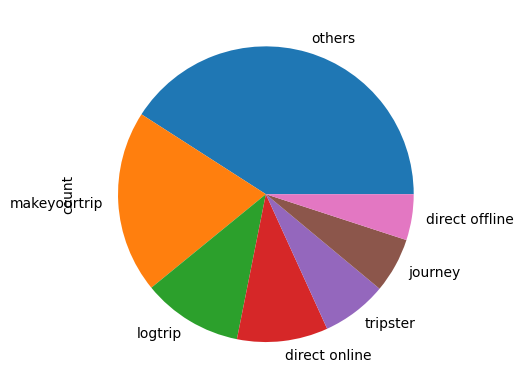

In [15]:
df_bookings.booking_platform.value_counts().plot(kind='pie')

<Axes: title={'center': 'Booking Platform'}, xlabel='booking_platform'>

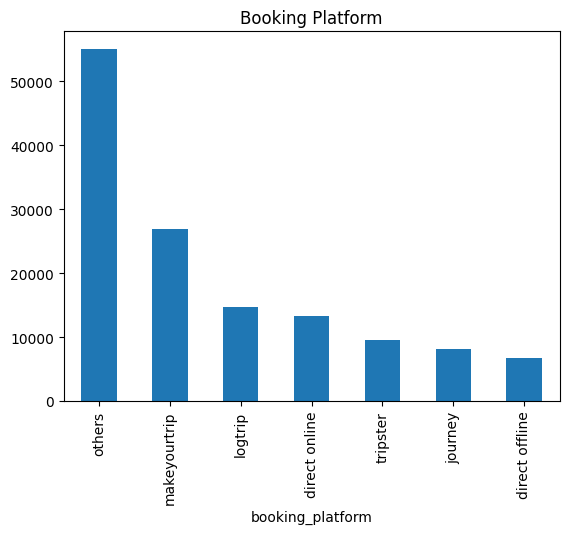

In [16]:
df_bookings.booking_platform.value_counts().plot(kind='bar', title='Booking Platform')

<Axes: ylabel='booking_platform'>

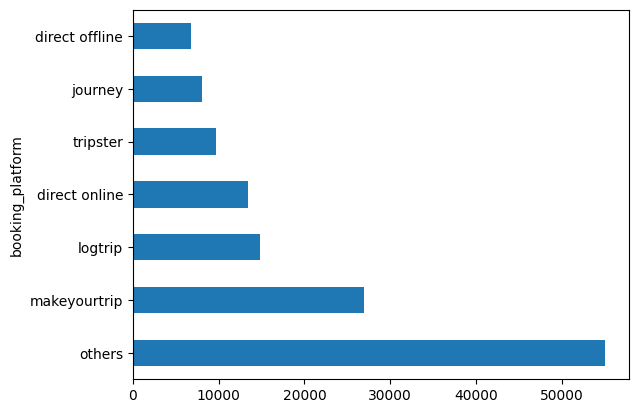

In [17]:
df_bookings.booking_platform.value_counts().plot(kind='barh')

<Axes: xlabel='booking_platform'>

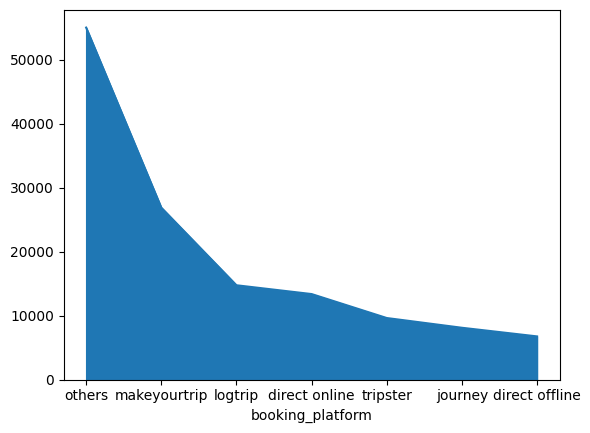

In [18]:
df_bookings.booking_platform.value_counts().plot(kind='area')

<Axes: >

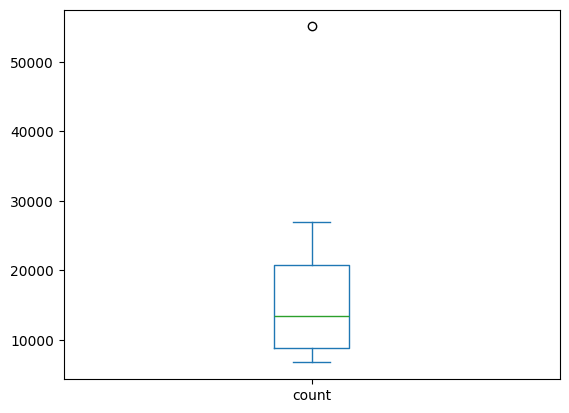

In [22]:
df_bookings.booking_platform.value_counts().plot(kind='box')

In [23]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [25]:
df_bookings.revenue_generated.min() , df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [27]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [28]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [29]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: ylabel='count'>

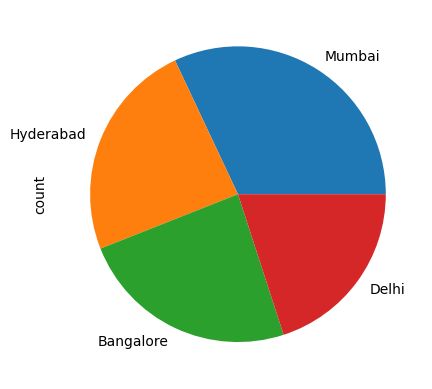

In [32]:
df_hotels.city.value_counts().plot(kind='pie')

In [33]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='category'>

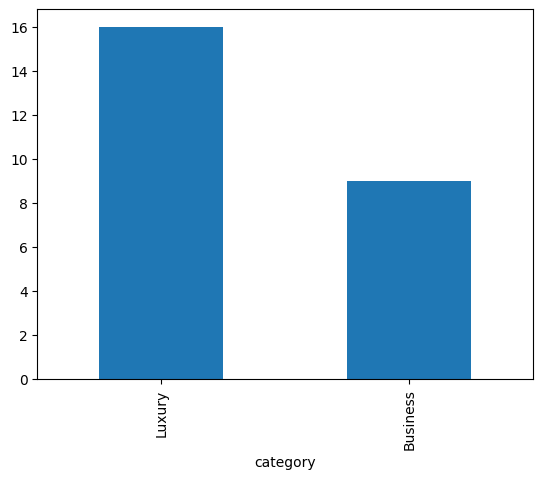

In [34]:
df_hotels.category.value_counts().plot(kind='bar')

In [35]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [36]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [41]:
# Count of records per property
df_agg_bookings.groupby('property_id')["successful_bookings"].count()

# Mean successful bookings per property
df_agg_bookings.groupby('property_id')["successful_bookings"].mean()

# Maximum successful bookings per property
df_agg_bookings.groupby('property_id')["successful_bookings"].max()

# Minimum successful bookings per property
df_agg_bookings.groupby('property_id')["successful_bookings"].min()

# Aggregate multiple statistics
df_agg_bookings.groupby('property_id')["successful_bookings"].agg(['sum', 'mean', 'max', 'min', 'count'])

,sum,mean,max,min,count
property_id,,,,,
16558,3153,8.567935,21,2,368
16559,7338,19.940217,40,8,368
16560,4693,12.752717,27,2,368
16561,4418,12.005435,24,4,368
16562,4820,13.097826,33,2,368
16563,7211,19.595109,100,8,368
17558,5053,13.730978,39,2,368
17559,6142,16.690217,38,6,368
17560,6013,16.339674,35,4,368


In [42]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [51]:
df_agg_bookings[df_agg_bookings["successful_bookings"] > df_agg_bookings["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [52]:
df_agg_bookings[df_agg_bookings["successful_bookings"] > df_agg_bookings["capacity"]].check_in_date

3        1-May-22
12       1-May-22
4136    11-Jun-22
6209     2-Jul-22
8522    25-Jul-22
9194    31-Jul-22
Name: check_in_date, dtype: object

In [54]:
df_agg_bookings[df_agg_bookings.apply(lambda row: row["successful_bookings"] > row["capacity"], axis=1)]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [55]:
df_agg_bookings[df_agg_bookings.apply(lambda row: row["successful_bookings"] > row["capacity"], axis=1)].check_in_date

3        1-May-22
12       1-May-22
4136    11-Jun-22
6209     2-Jul-22
8522    25-Jul-22
9194    31-Jul-22
Name: check_in_date, dtype: object

In [57]:
df_agg_bookings.capacity.max()

np.float64(50.0)

In [60]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [66]:
df_agg_bookings[
    (pd.to_datetime(df_agg_bookings.check_in_date, format='%d-%b-%y') >= pd.to_datetime('1-May-22', format='%d-%b-%y')) &
    (pd.to_datetime(df_agg_bookings.check_in_date, format='%d-%b-%y') <= pd.to_datetime('31-May-22', format='%d-%b-%y'))
]

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
3095,17562,31-May-22,RT4,3,6.0
3096,19563,31-May-22,RT4,3,6.0
3097,19558,31-May-22,RT4,3,7.0
3098,19561,31-May-22,RT4,3,7.0


<Axes: xlabel='check_in_date'>

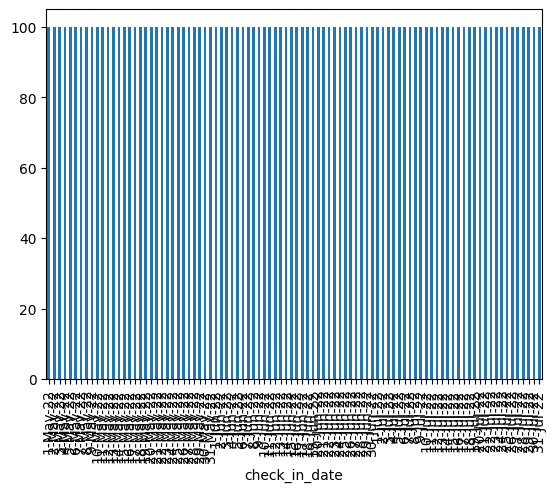

In [67]:
df_agg_bookings.check_in_date.value_counts().plot(kind='bar')

<Axes: title={'center': 'Bookings per Month'}, xlabel='mmm yy'>

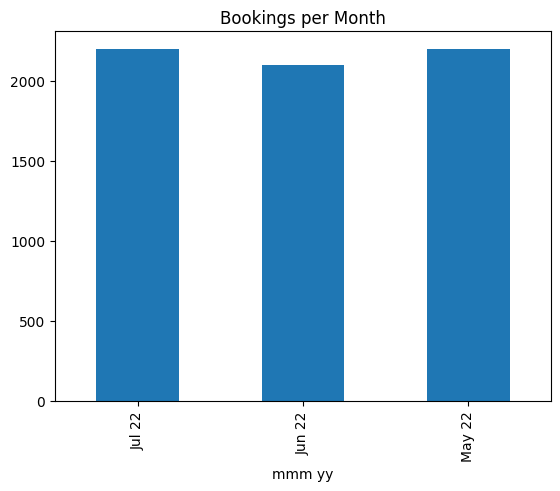

In [69]:
# Merge to get month info for each check-in date
df_merged['mmm yy'].value_counts().sort_index().plot(kind='bar', title='Bookings per Month')


In [71]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


<Axes: xlabel='room_category', ylabel='capacity'>

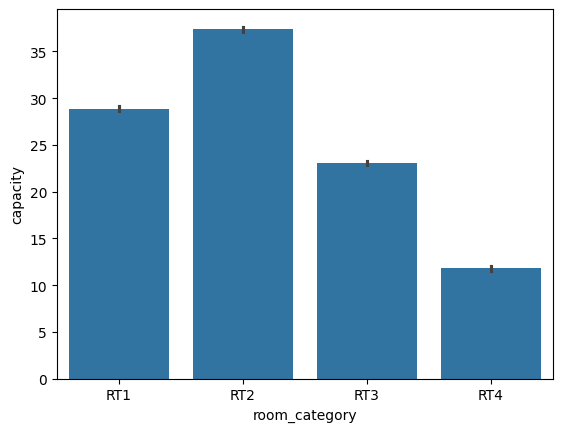

In [72]:
sns.barplot(data = df_agg_bookings, x = "room_category", y="capacity")

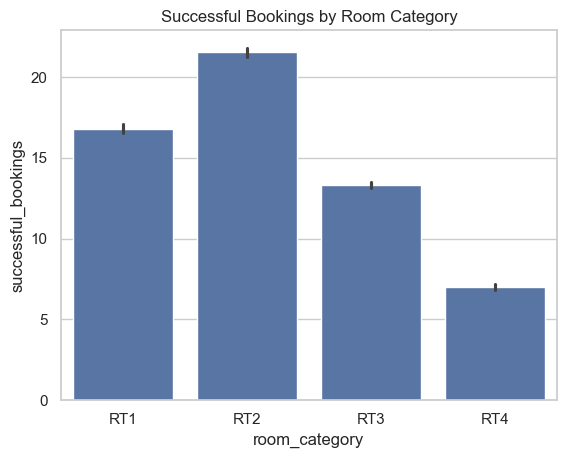

In [80]:
sns.set_theme(style="whitegrid")
sns.barplot(x='room_category', y='successful_bookings', data=df_agg_bookings)
plt.title("Successful Bookings by Room Category")
plt.show()

<Axes: xlabel='room_category', ylabel='utilization'>

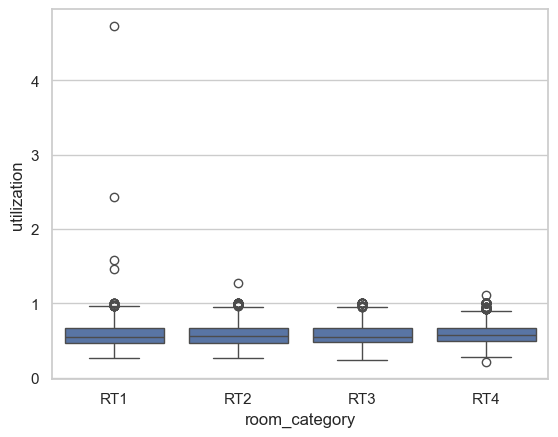

In [81]:
df_agg_bookings['utilization'] = df_agg_bookings['successful_bookings'] / df_agg_bookings['capacity']
sns.boxplot(x='room_category', y='utilization', data=df_agg_bookings)

In [84]:
df_agg_bookings.groupby("room_category")["capacity"]

In [90]:
for g, data in df_agg_bookings.groupby("room_category")["capacity"]:
    print('Category:', g)
    print('Capacity:', data.values)

Category: RT1
Capacity: [30. 30. 30. ... 24. 36. 16.]
Category: RT2
Capacity: [23. 29. 36. ... 45. 45. 45.]
Category: RT3
Capacity: [29. 29. 29. ... 16. 23. 24.]
Category: RT4
Capacity: [3. 6. 6. ... 6. 6. 4.]


In [92]:
df_agg_bookings.groupby("room_category")["capacity"].count()

room_category
RT1    2298
RT2    2300
RT3    2300
RT4    2300
Name: capacity, dtype: int64

In [93]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000
